In [1]:
import pandas as pd
import seaborn as sns
import networkx as nx
import numpy as np
from funding import core
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib import rcParams

In [2]:
path = '/u/miaoli/ember_home/dropbox/NationalFunding/Data/DerivedData/Derived/network/all2all_backbone_alpha0005.graphml'

plot_path="all_plot.pdf"

In [3]:
# Parameters
path = "../data/NationalFunding/Data/DerivedData/Derived/network/all2all_backbone_alpha0005.graphml"
plot_path = "../data/NationalFunding/Figs/Figs/network/backbone_all_alpha0005.pdf"


In [4]:
g = nx.read_graphml(path)

In [5]:
region2color=dict()
region2color['Asia']="#F27405"
region2color['Europe']='#B1E4FF'
region2color['Africa']="#00BF8A"
region2color['North America']="#38BDFF"
region2color['South America']="#8CBA00"
region2color['Oceania']="#885452"

In [6]:
node_pos=dict()
node_size=[]
node_color=[]
for node in g.nodes():
    pos=[g.nodes[node]['x'],g.nodes[node]['y']]
    node_pos[node]=pos
    node_size.append(g.out_degree(node)*3.5+10)
    node_color.append(region2color[g.nodes[node]['region']])

In [7]:
edge_color=[]
for item in g.edges():
    target_cntry=item[1]
    region_target=g.nodes[target_cntry]['region']
    color_target=region2color[region_target]
    edge_color.append(color_target)


In [8]:
# set the default font family to Helvetica
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

In [9]:
def derive_labelsize(node_size_list,labelsize_min=7, labelsize_max=12):
    min_value = min(node_size_list)
    max_value = max(node_size_list)
    scaled_numbers = [(x - min_value) / (max_value - min_value) * (labelsize_max - labelsize_min) + labelsize_min for x in node_size_list]
    return scaled_numbers
label_size=derive_labelsize(node_size)

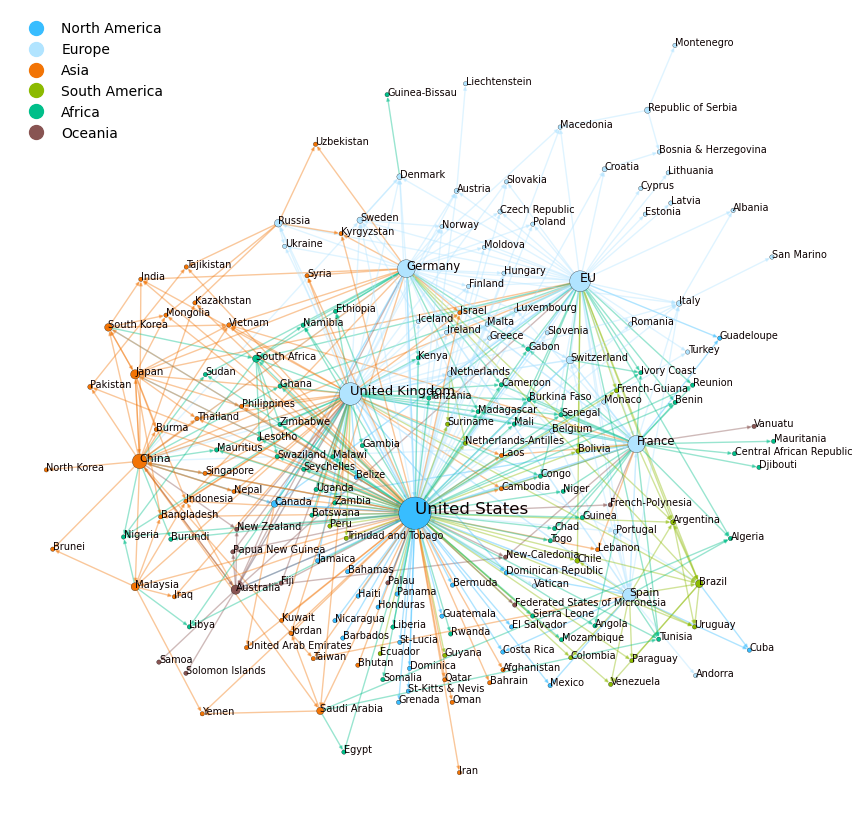

In [10]:
fig, ax=plt.subplots(figsize=(8,8))
nx.draw_networkx_nodes(g, pos=node_pos, node_size=node_size, 
                       node_color=node_color,
                       linewidths=0.2,
                       edgecolors='black',
                      ax=ax)
nx.draw_networkx_edges(g, 
                       pos=node_pos,
                       node_size=node_size, 
                       edge_color=edge_color,
                       arrowsize=5,
                       ax=ax,
                       alpha=0.4,
                       min_source_margin=0,
                       min_target_margin=0)
texts = [ax.text(g.nodes[node]['x'],g.nodes[node]['y'], node, size=label_size[ind], color='#0C0000') for ind, node in enumerate(list(g.nodes()))]
#adjust_text(texts)

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

legend_order = ['North America', 'Europe', 'Asia', 'South America', 'Africa','Oceania']
# Create a list of legend handles and labels in the desired order
legend_handles = [plt.plot([], [], 'o', color=region2color[region], markersize=10)[0] for region in legend_order]
legend_labels = legend_order
plt.legend(legend_handles, legend_labels, loc='upper left', title='',frameon=False)

plt.margins(0,0)
plt.savefig(plot_path,bbox_inches='tight')